# 0 - **Introdução**

A Análise abaixo foi realizada utilizando os dados disponilizados pelo Instituto Nacional de Estudos e Pesquisas Educacionais [(Inep)](https://www.gov.br/inep/pt-br).

Realizei essa Análise com o intuito de entender o perfil dos participantes do Exame Nacional do Ensino Médio (Enem).

Algumas perguntas que eu irei tentar responder:

* Existe alguma disparidade significativa de desempenho entre alunos de escolas públicas e privadas?
* Como as notas se comparam entre as diferentes regiões do país?
* Como o gênero dos alunos esta relacionado ao desempenho no exame?

Fonte do dataset: [Dados Abertos Enem](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem).


# 1 - ***Carregando bibliotecas***

In [228]:
import pandas as pd 

import numpy as np

import seaborn as sns 

import matplotlib.pyplot as plt

plt.style.use('ggplot')



# 2 - ***Carregando Dataset***

In [229]:
enem = pd.read_csv(r'MICRODADOS_ENEM_2022.csv', sep=';', encoding='ISO-8859-1')

In [230]:
print(enem.info())
print(enem.count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476105 entries, 0 to 3476104
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

In [231]:
enem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [232]:
colunas_selecionadas = ['TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'IN_TREINEIRO', 'NO_MUNICIPIO_ESC',
       'SG_UF_ESC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO',
       'NU_NOTA_REDACAO']

In [233]:
enem_selecionados = enem.filter(items= colunas_selecionadas)

enem_selecionados.count()

TP_FAIXA_ETARIA      3476105
TP_SEXO              3476105
TP_ESTADO_CIVIL      3476105
TP_COR_RACA          3476105
TP_ST_CONCLUSAO      3476105
TP_ESCOLA            3476105
IN_TREINEIRO         3476105
NO_MUNICIPIO_ESC      951944
SG_UF_ESC             951944
NU_NOTA_CN           2355395
NU_NOTA_CH           2493442
NU_NOTA_LC           2493442
NU_NOTA_MT           2355395
TP_LINGUA            3476105
TP_STATUS_REDACAO    2493442
NU_NOTA_REDACAO      2493442
dtype: int64

In [234]:
enem_selecionados.head(10)

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,IN_TREINEIRO,NO_MUNICIPIO_ESC,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO
0,14,M,2,2,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,14,M,2,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,5,F,1,2,1,1,0,NaN,NaN,421.1,546.0,498.8,565.3,1,1.0,760.0
3,6,M,1,3,1,1,0,NaN,NaN,490.7,388.6,357.8,416.0,1,1.0,320.0
4,4,M,0,3,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
5,5,F,1,3,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
6,4,M,1,2,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
7,6,F,1,2,1,1,0,NaN,NaN,398.1,427.3,400.2,404.9,1,1.0,440.0
8,8,F,1,3,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
9,4,F,1,3,1,1,0,NaN,NaN,467.5,461.0,466.7,435.3,1,1.0,360.0


# 3 - ***Análise Univariada***

In [235]:
coluna_SG_UF_ESC = enem_selecionados["SG_UF_ESC"].value_counts().sort_index()

coluna_SG_UF_ESC

SG_UF_ESC
AC      4291
AL     15685
AM     27737
AP      3869
BA     44483
CE    102972
DF     19348
ES     19998
GO     47563
MA     27679
MG     68869
MS     13105
MT     16877
PA     34897
PB     21483
PE     43562
PI     16296
PR     50307
RJ     68435
RN     16701
RO      9687
RR      2219
RS     41842
SC     31316
SE     10802
SP    184295
TO      7626
Name: count, dtype: int64

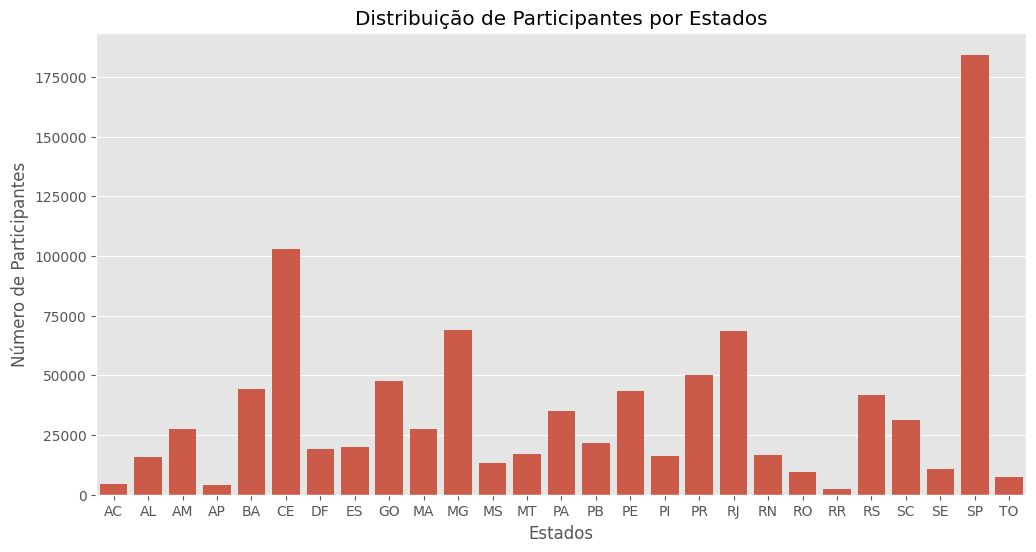

In [236]:
_ = plt.figure(figsize=(12, 6))
_ = sns.barplot(x=coluna_SG_UF_ESC.index, y=coluna_SG_UF_ESC.values)
_ = plt.title('Distribuição de Participantes por Estados')
_ = plt.xlabel('Estados')
_ = plt.ylabel('Número de Participantes')

In [237]:
coluna_TP_SEXO = enem_selecionados["TP_SEXO"].value_counts().sort_index()
coluna_TP_SEXO.values

array([2120519, 1355586], dtype=int64)

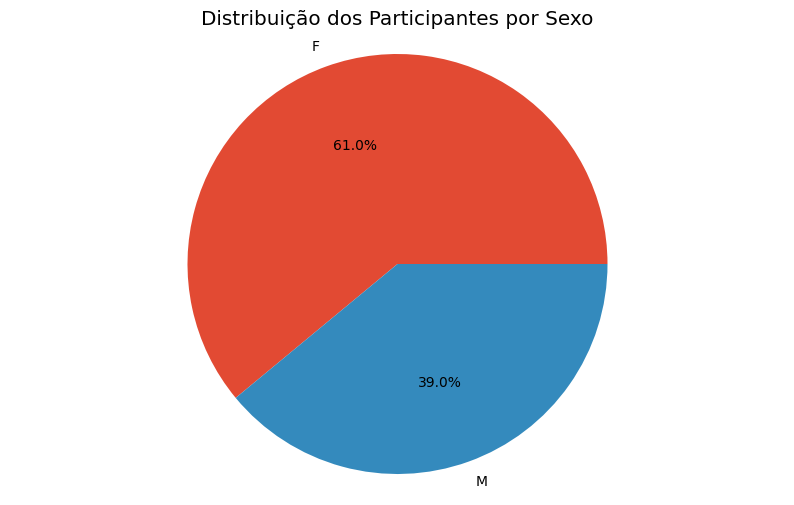

In [238]:
_ = plt.figure(figsize=(10, 6))
_ = plt.pie(coluna_TP_SEXO.values, labels=coluna_TP_SEXO.index, autopct='%1.1f%%')
_ = plt.axis('equal')
_ = plt.title("Distribuição dos Participantes por Sexo")

# 4 - ***Analise Multivariada***

__*Nota para responder algumas perguntas relacionadas a desempenho estarei utilizando a mediana das notas dos participantes__

In [239]:
colunas_publica_privada = ['TP_ESCOLA','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

colunas_regiao = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'SG_UF_ESC']

colunas_genero = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'TP_SEXO']

estado_para_regiao = {
    'SP': 'Sudeste',
    'RJ': 'Sudeste',
    'MG': 'Sudeste',
    'ES': 'Sudeste',
    'RS': 'Sul',
    'SC': 'Sul',
    'PR': 'Sul',
    'BA': 'Nordeste',
    'CE': 'Nordeste',
    'PE': 'Nordeste',
    'RN': 'Nordeste',
    'AM': 'Norte',
    'PA': 'Norte',
    'TO': 'Norte',
    'AC': 'Norte',
    'RR': 'Norte',
    'RO': 'Norte',
    'AP': 'Norte',
    'MA': 'Nordeste',
    'PI': 'Nordeste',
    'PB': 'Nordeste',
    'SE': 'Nordeste',
    'AL': 'Nordeste',
    'MT': 'Centro-Oeste',
    'MS': 'Centro-Oeste',
    'GO': 'Centro-Oeste',
    'DF': 'Centro-Oeste'
}

In [240]:
enem_publica_privada = enem.filter(items= colunas_publica_privada).dropna()

enem_estado = enem.filter(items= colunas_regiao).dropna()

enem_genero = enem.filter(items= colunas_genero).dropna()

### Observando o gráfico e a tabela abaixo, fica evidente que há uma disparidade significativa nos resultados entre alunos de escolas públicas e privadas. Em algumas áreas de conhecimento, essa diferença chega a ultrapassar os 100 pontos!

> Legenda:
>* __NU_NOTA_CN:__ Nota da prova de Ciências da Natureza
>* __NU_NOTA_CH:__ Nota da prova de Ciências Humanas
>* __NU_NOTA_LC:__ Nota da prova de Linguagens e Códigos
>* __NU_NOTA_MT:__ Nota da prova de Matemática
>* __NU_NOTA_REDACAO:__ Nota da prova de redação
>* __TP_ESCOLA:__ Tipo de Escola do Ensino Médio
>   * 1 = Não Informado
>   * 2 = Público
>   * 3 = Privado

In [241]:
enem_publica_privada.groupby('TP_ESCOLA').median()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
TP_ESCOLA,,,,,
1,488.3,537.9,532.6,535.6,640.0
2,470.6,513.1,508.6,503.4,600.0
3,538.8,579.7,567.4,621.4,780.0


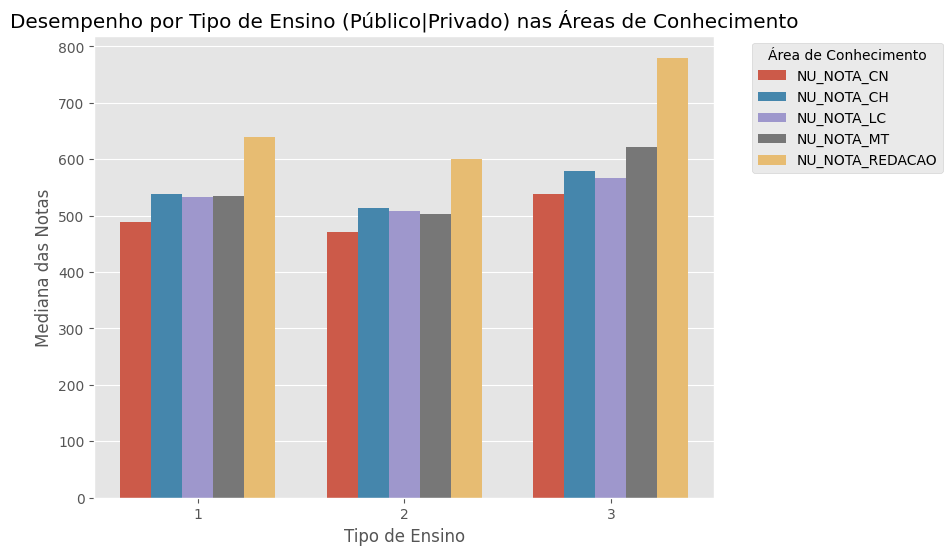

In [242]:
enem_publica_privada_grafico = enem_publica_privada.groupby('TP_ESCOLA').median().reset_index()


enem_pub_priv_grafico_formatado = pd.melt(enem_publica_privada_grafico, id_vars=['TP_ESCOLA'], var_name='Área de Conhecimento', value_name='Mediana das Notas')

_ = plt.figure(figsize=(8, 6))
_ = sns.barplot(x='TP_ESCOLA', y='Mediana das Notas', hue='Área de Conhecimento', data=enem_pub_priv_grafico_formatado, dodge=True, width=0.75)
_ = plt.xlabel('Tipo de Ensino')
_ = plt.ylabel('Mediana das Notas')
_ = plt.title('Desempenho por Tipo de Ensino (Público|Privado) nas Áreas de Conhecimento')
_ = plt.legend(title='Área de Conhecimento', bbox_to_anchor=(1.05, 1))

### Observando o gráfico e a tabela abaixo, apesar de algumas variações, não houve uma diferença significativa de desempenho entre as diferentes regiões do país. As medianas se mantiveram relativamente próximas entre as regiões, sugerindo uma certa homogeneidade no desempenho dos participantes do Enem em todo o país.

> Legenda:
>* __NU_NOTA_CN:__ Nota da prova de Ciências da Natureza
>* __NU_NOTA_CH:__ Nota da prova de Ciências Humanas
>* __NU_NOTA_LC:__ Nota da prova de Linguagens e Códigos
>* __NU_NOTA_MT:__ Nota da prova de Matemática
>* __NU_NOTA_REDACAO:__ Nota da prova de redação
>* __NO_REGIAO:__ Nome da Região

In [243]:
enem_estado['NO_REGIAO'] = enem_estado['SG_UF_ESC'].map(estado_para_regiao)

enem_regiao = enem_estado.groupby('NO_REGIAO')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].median().reset_index()

enem_regiao

,NO_REGIAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,Centro-Oeste,487.5,530.7,526.2,532.1,640.0
1,Nordeste,474.9,510.6,503.5,507.0,640.0
2,Norte,467.2,506.2,496.6,488.3,600.0
3,Sudeste,502.9,551.0,547.3,572.7,660.0
4,Sul,503.4,545.6,541.1,562.2,640.0


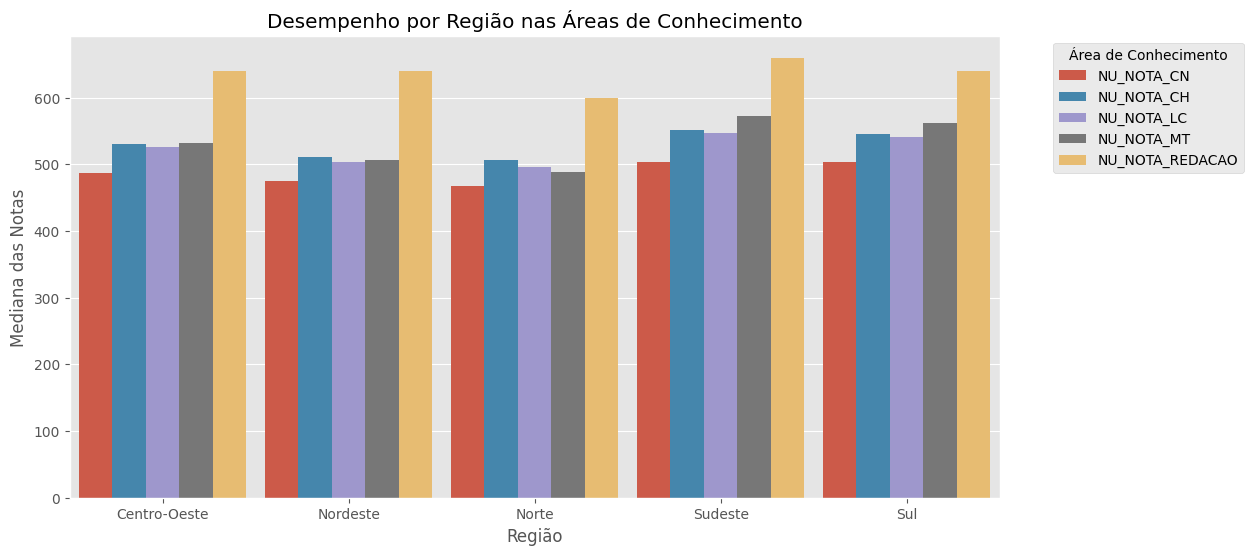

In [244]:

enem_regiao_grafico = enem_regiao.groupby('NO_REGIAO').median().reset_index()

enem_regiao_grafico_formatado = pd.melt(enem_regiao_grafico, id_vars=['NO_REGIAO'], var_name='Área de Conhecimento', value_name='Mediana das Notas')

_ = plt.figure(figsize=(12, 6))
_ = sns.barplot(x='NO_REGIAO', y='Mediana das Notas', hue='Área de Conhecimento', data=enem_regiao_grafico_formatado, dodge=True, width=0.9)
_ = plt.xlabel('Região')
_ = plt.ylabel('Mediana das Notas')
_ = plt.title('Desempenho por Região nas Áreas de Conhecimento')
_ = plt.legend(title='Área de Conhecimento', bbox_to_anchor=(1.05, 1))

### Observando a mediana das notas por sexo, encontramos uma certa uniformidade no desempenho entre meninos e meninas. No entanto, há um pequeno destaque para o sexo feminino na redação, indicando um desempenho ligeiramente superior nessa área. Por outro lado, os alunos do sexo masculino apresentaram um desempenho ligeiramente melhor em matemática, ciências da natureza e ciências humanas. Essas diferenças, embora sutis, podem refletir diferenças nos interesses ou habilidades dos alunos em áreas específicas.

> Legenda:
>* __NU_NOTA_CN:__ Nota da prova de Ciências da Natureza
>* __NU_NOTA_CH:__ Nota da prova de Ciências Humanas
>* __NU_NOTA_LC:__ Nota da prova de Linguagens e Códigos
>* __NU_NOTA_MT:__ Nota da prova de Matemática
>* __NU_NOTA_REDACAO:__ Nota da prova de redação
>* __TP_SEXO:__ Sexo

In [245]:
enem_genero.groupby('TP_SEXO').median().reset_index()

,TP_SEXO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,F,478.1,527.1,526.2,512.2,640.0
1,M,499.2,542.8,530.3,563.0,620.0


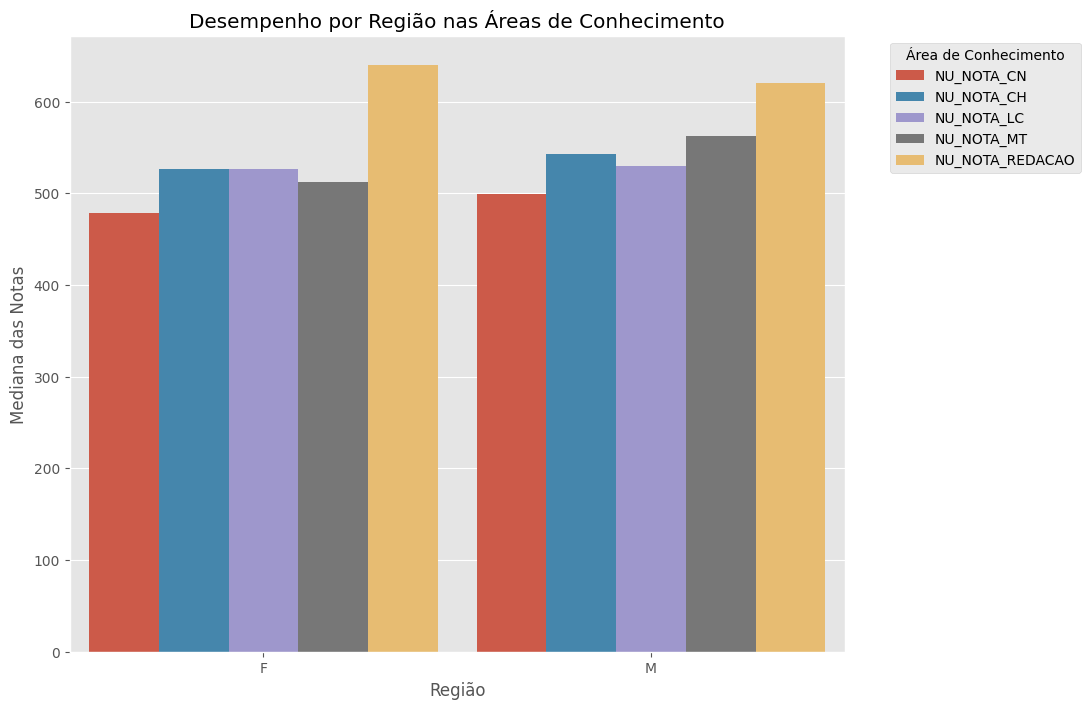

In [246]:
enem_genero_grafico = enem_genero.groupby('TP_SEXO').median().reset_index()

enem_genero_grafico_formatado = pd.melt(enem_genero_grafico, id_vars=['TP_SEXO'], var_name='Área de Conhecimento', value_name='Mediana das Notas')

_ = plt.figure(figsize=(10, 8))
_ = sns.barplot(x='TP_SEXO', y='Mediana das Notas', hue='Área de Conhecimento', data=enem_genero_grafico_formatado, dodge=True, width=0.9)
_ = plt.xlabel('Região')
_ = plt.ylabel('Mediana das Notas')
_ = plt.title('Desempenho por Região nas Áreas de Conhecimento')
_ = plt.legend(title='Área de Conhecimento', bbox_to_anchor=(1.05, 1))